# Homework 4 Question 1 (Value Function Iteration)

In [4]:
from IPython.display import display, Math, Latex
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
from operator import itemgetter
from mpl_toolkits.mplot3d import Axes3D
import math
from math import exp
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from math import log
plt.style.use("ggplot")

In [74]:
theta = 0.679
beta = 0.988
delta = 0.013
h = 1
#k = ((beta**(-1)-1+delta)/((1-theta)*h**theta))**(-1/theta)
k = 1

## 1 a)

In [153]:
def m(ki, kj):
    c = ki**(1-theta)*h**theta+(1-delta)-kj
    #print(c)
    #Step 4 (consumption must be non negative)
    if c >= 0:
        return math.log(c)
    else:
        return -10000000

In [255]:
k_min = 0.01
k_max = 2
p = 200

#Step 1
k = np.linspace(k_min, k_max, p) #The continuous variable k is discretized by defining a grid for the values of k

#Step 2
V = []
V.append(np.zeros(p)) #Guess a solution
V.append(np.zeros(p))
k_dec = []
k_dec.append(np.zeros(p))
#ki_dec = []
#ki_dec.append(np.zeros(p))
kj_dec = []
kj_dec.append(np.zeros(p))

#Step 3
#Define the return matrix M

M = [0]*p
for i in range(p):
    M[i] = [0] * p

for i in range(p):
    for j in range(p):
        M[i][j] = m(k[i], k[j])


Chi = M + np.multiply(beta,V[-1])
V.append(Chi.max(1))
k_dec.append(Chi.argmax(1))
#ki_dec.append()
kj_dec.append(k[k_dec[-1]])

while np.linalg.norm(V[-1] - V[-2]) > 0.01: #STEP 6: If ||Vs+1 − Vs|| < ε, stop and report success. Otherwise, go back to the previous step, STEP 5, replacing s = s + 1.
    #STEP 5.1: Compute the matrix, χ
    Chi = M + np.multiply(beta,V[-1])
    
    #STEP 5.2: Compute the updated value function Vs+1 as the maximum element in each row of χ
    V.append(Chi.max(1))
    k_dec.append(Chi.argmax(1))
    kj_dec.append(k[k_dec[-1]])

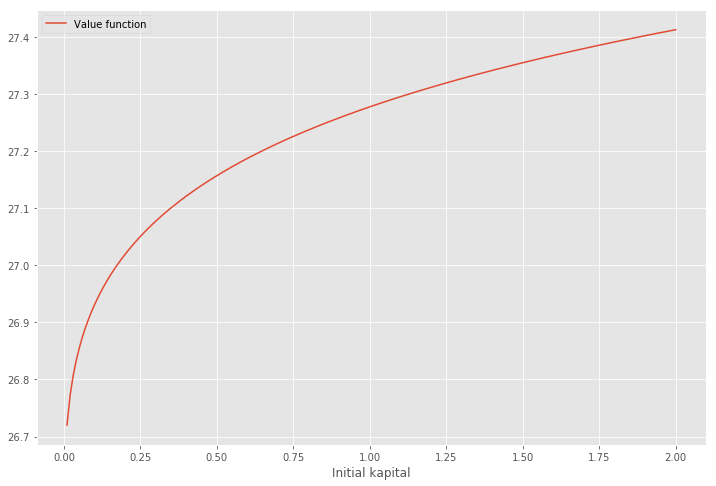

In [256]:
def plot1A():
    plt.plot(k, V[-1], label='Value function')
    plt.legend()
    plt.rcParams["figure.figsize"] = (12,8)
    plt.xlabel('Initial kapital')
    
plot1A()